<a href="https://colab.research.google.com/github/Vishwas2505/Data-Science/blob/main/matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

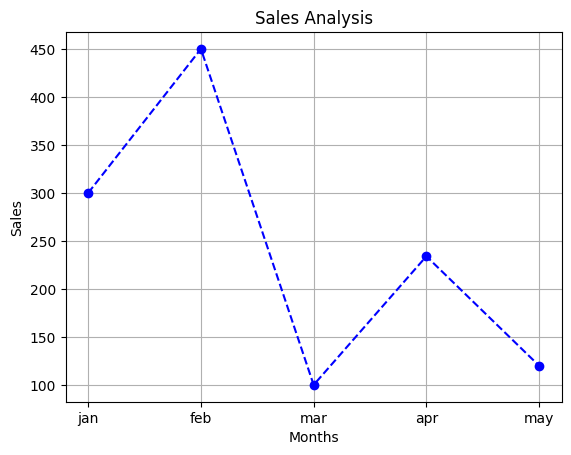

In [ ]:
#sample data
months=['jan','feb','mar','apr','may']
sales=[300,450,100,234,120]
plt.plot(months,sales,marker='o',color='blue',linestyle='--')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.title('Sales Analysis')
plt.grid(True)
plt.show()

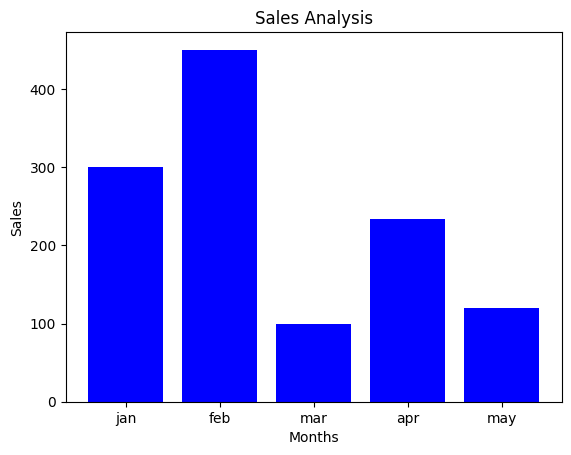

In [ ]:
#bar chart
plt.bar(months,sales,color='blue')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.title('Sales Analysis')
plt.show()

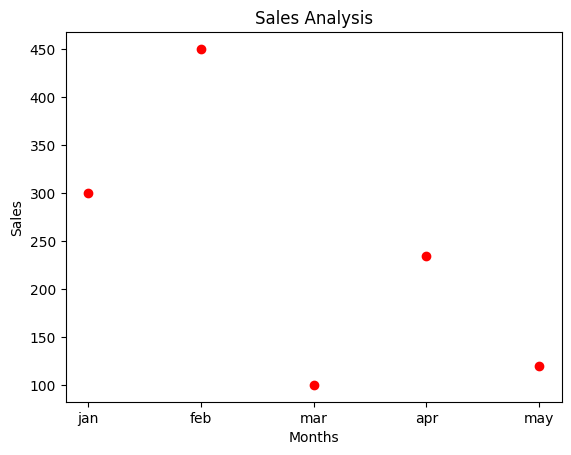

In [ ]:
#scatter plot
plt.scatter(months,sales,color='red')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.title('Sales Analysis')
plt.show()

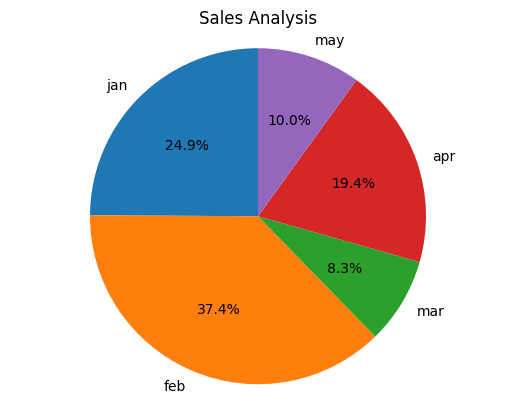

In [ ]:
#pie chart
plt.pie(sales,labels=months,autopct='%1.1f%%',startangle=90)
plt.axis('equal')
plt.title('Sales Analysis')
plt.show()

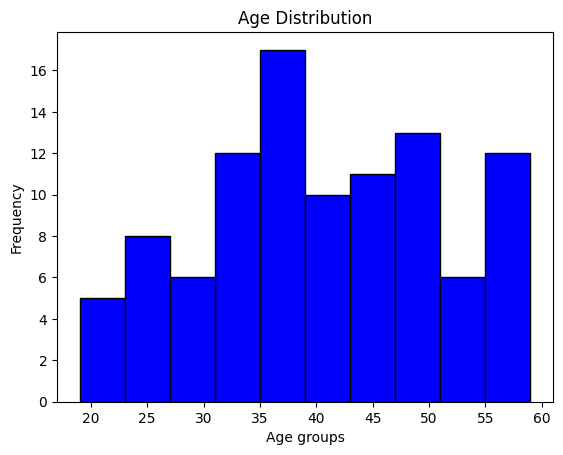

In [ ]:
import numpy as np
ages=np.random.randint(18,60,100)
plt.hist(ages,bins=10,color='blue',edgecolor='black')
plt.xlabel('Age groups')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

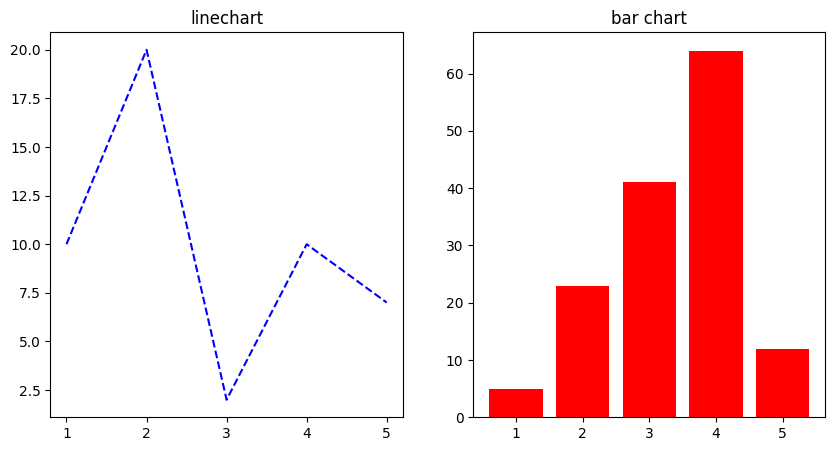

In [ ]:
#subplot
x=[1,2,3,4,5]
y1=[10,20,2,10,7]
y2=[5,23,41,64,12]
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)#1row 2columns 1fig
plt.plot(x,y1,linestyle='--',color='blue')
plt.title("linechart")
plt.subplot(1,2,2)
plt.bar(x,y2,color='red')
plt.title("bar chart")
plt.show()

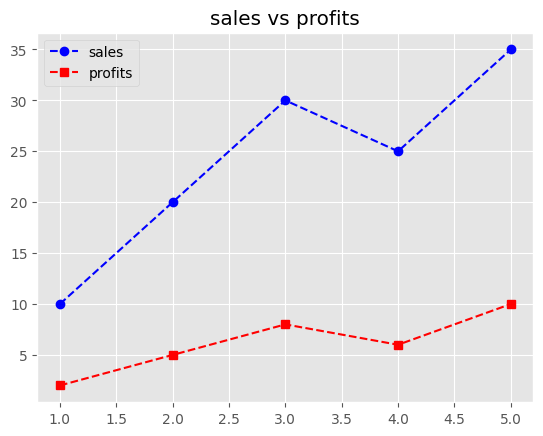

In [ ]:
#plot in a plot
plt.style.use('ggplot')
x=[1,2,3,4,5]
sales=[10,20,30,25,35]
profits=[2,5,8,6,10]
plt.plot(x,sales,marker='o',linestyle='--',color='blue',label='sales')
plt.plot(x,profits,marker='s',linestyle='--',color='red',label='profits')
plt.title("sales vs profits")
plt.legend()
plt.grid(True)
plt.savefig('sales_profit.png')
plt.show()

In [ ]:
import pandas as pd
df=pd.read_csv("data.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv')
df.head()

,Duration,Date,Pulse,Maxpulse,Calories
0,60,2020/12/01,110,130,409.1
1,60,2020/12/02,117,145,479.0
2,60,2020/12/03,103,135,340.0
3,45,2020/12/04,109,175,282.4
4,45,2020/12/05,117,148,406.0


In [ ]:
print(df.isnull().sum())
df.dtypes

Duration    0
Date        1
Pulse       0
Maxpulse    0
Calories    2
dtype: int64


,0
Duration,int64
Date,object
Pulse,int64
Maxpulse,int64
Calories,float64


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv')
df.head()

,Duration,Date,Pulse,Maxpulse,Calories
0,60,2020/12/01,110,130,409.1
1,60,2020/12/02,117,145,479.0
2,60,2020/12/03,103,135,340.0
3,45,2020/12/04,109,175,282.4
4,45,2020/12/05,117,148,406.0


In [ ]:
print(df.isnull().sum())
df.dtypes

Duration    0
Date        1
Pulse       0
Maxpulse    0
Calories    2
dtype: int64


,0
Duration,int64
Date,object
Pulse,int64
Maxpulse,int64
Calories,float64


In [ ]:
df.isnull().sum()

,0
Duration,0
Date,1
Pulse,0
Maxpulse,0
Calories,2


In [ ]:
df.duplicated().sum()
df=df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
invalid_dates = df['Date'].isna().sum()


df = df.sort_values(by='Date')

print(f"Number of invalid or missing dates: {invalid_dates}")


Number of invalid or missing dates: 1


In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

print(" Missing numeric values handled using median imputation.")


 Missing numeric values handled using median imputation.


In [ ]:
print("Final Dataset Overview")
print("Rows and Columns:", df.shape)
print("Missing Values Remaining:\n", df.isnull().sum())
print("Data Types:\n", df.dtypes)


Final Dataset Overview
Rows and Columns: (31, 5)
Missing Values Remaining:
 Duration    0
Date        1
Pulse       0
Maxpulse    0
Calories    0
dtype: int64
Data Types:
 Duration             int64
Date        datetime64[ns]
Pulse                int64
Maxpulse             int64
Calories           float64
dtype: object


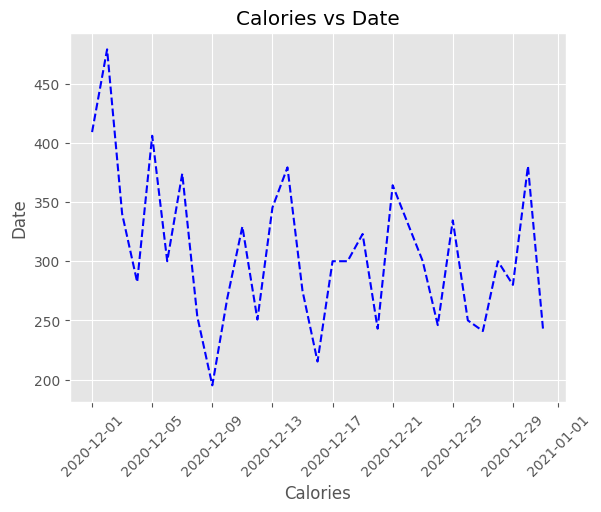

In [ ]:
#line chart for given dataset
plt.plot(df['Date'],df['Calories'],linestyle='--',color=  'blue')
plt.xticks(rotation=45)
plt.grid(True)
plt.xlabel('Calories')
plt.ylabel('Date')
plt.title('Calories vs Date')
plt.savefig('line_calories_over_time.png')
plt.show()

/tmp/ipython-input-2879813997.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_pulse_by_duration = df.groupby('Duration_Group')['Pulse'].mean().reset_index()


  Duration_Group       Pulse
0           0-10         NaN
1          10-20         NaN
2          20-30  109.000000
3          30-40         NaN
4          40-60  103.413793
5            60+  104.000000


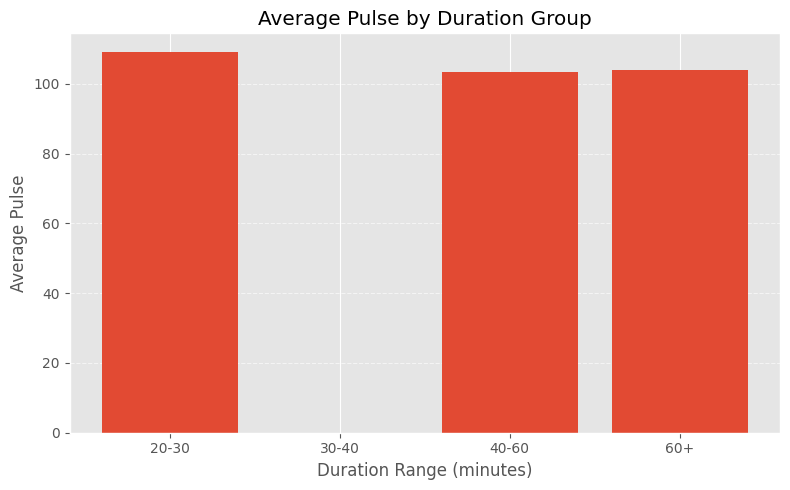

In [ ]:
# Create bins for Duration
bins = [0, 10, 20, 30, 40, 60, df['Duration'].max()]
labels = ['0-10', '10-20', '20-30', '30-40', '40-60', '60+']

df['Duration_Group'] = pd.cut(df['Duration'], bins=bins, labels=labels, include_lowest=True)
# Group data by Duration_Group
avg_pulse_by_duration = df.groupby('Duration_Group')['Pulse'].mean().reset_index()

print(avg_pulse_by_duration)

plt.figure(figsize=(8,5))
plt.bar(avg_pulse_by_duration['Duration_Group'].astype(str), avg_pulse_by_duration['Pulse'])
plt.title("Average Pulse by Duration Group")
plt.xlabel("Duration Range (minutes)")
plt.ylabel("Average Pulse")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Save chart
plt.savefig("bar_avg_pulse_by_duration.png")
plt.show()


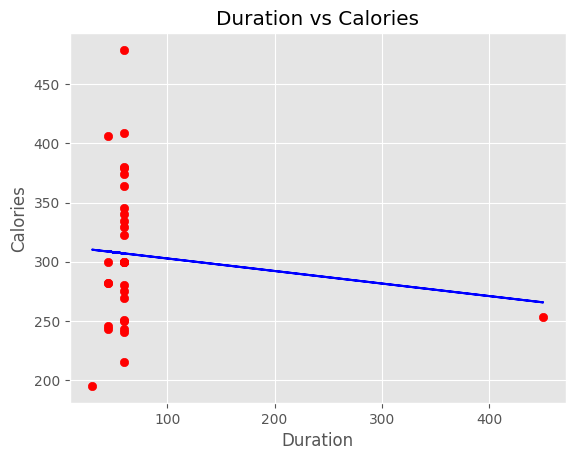

In [ ]:
plt.scatter(df['Duration'],df['Calories'],color='red')
m,b = np.polyfit(df['Duration'],df['Calories'],1)
plt.plot(df['Duration'],m*df['Duration']+b,color='blue')
plt.xlabel('Duration')
plt.ylabel('Calories')
plt.title('Duration vs Calories')
plt.grid(True)
plt.savefig('scatter_duration_vs_calories.png')
plt.show()

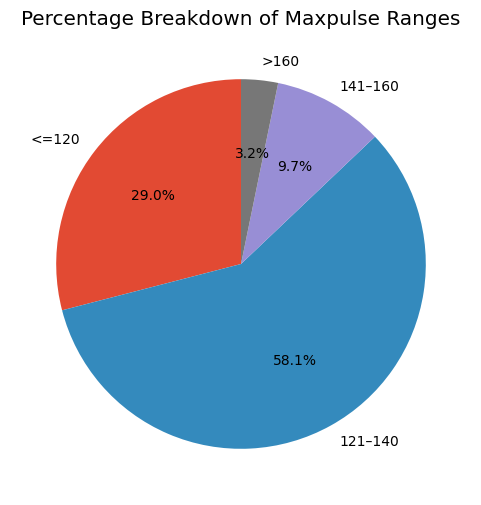

In [ ]:
# pie chart
bins = [0, 120, 140, 160, np.inf]
labels = ["<=120", "121–140", "141–160", ">160"]
df["MaxpulseRange"] = pd.cut(df["Maxpulse"], bins=bins, labels=labels)

range_counts = df["MaxpulseRange"].value_counts().sort_index()

plt.figure(figsize=(6,6))
plt.pie(range_counts, labels=range_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Percentage Breakdown of Maxpulse Ranges")
plt.savefig("pie_maxpulse_ranges.png")
plt.show()


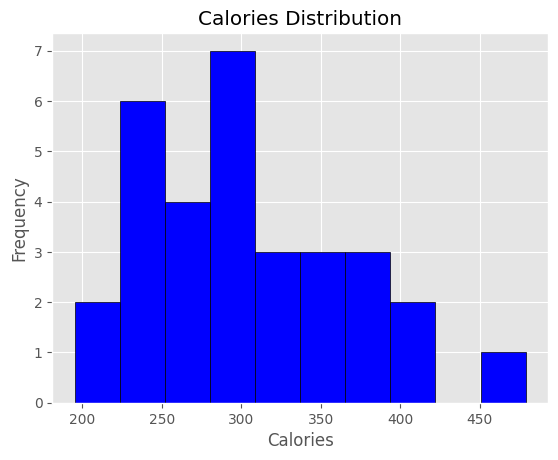

The distribution is positively skewed.


In [ ]:
plt.hist(df['Calories'],bins=10,color='blue',edgecolor='black')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Calories Distribution')
plt.savefig('hist_calories_distribution.png')
plt.show()

skewness=df['Calories'].skew()
if skewness > 0:
  print("The distribution is positively skewed.")
elif skewness < 0:
  print("The distribution is negatively skewed.")
else:
  print("The distribution is approximately symmetric.")

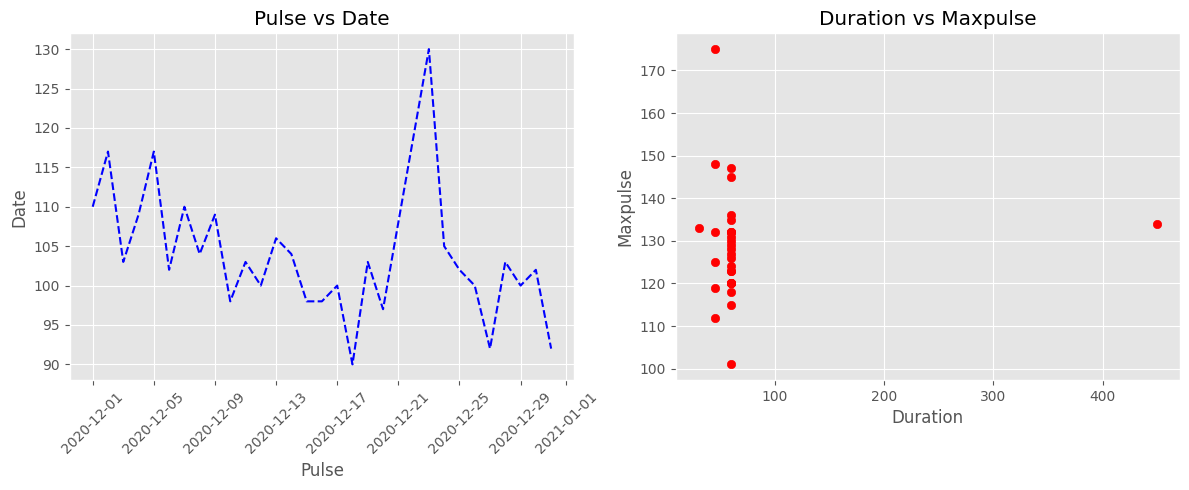

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(df['Date'],df['Pulse'],linestyle='--',color='blue')
plt.xticks(rotation=45)
plt.grid(True)
plt.xlabel('Pulse')
plt.ylabel('Date')
plt.title('Pulse vs Date')
plt.subplot(1,2,2)
plt.scatter(df['Duration'],df['Maxpulse'],color='red')
plt.xlabel('Duration')
plt.ylabel('Maxpulse')
plt.title('Duration vs Maxpulse')
plt.grid(True)
plt.savefig('scatter_duration_vs_maxpulse.png')
plt.tight_layout()
plt.show()